In [73]:
#Load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [74]:
# Load the data from the directory
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
# Join the features on 'account_id' from two csv's
train_data = X_train.merge(y_train, on='account_id')
test_data = X_test.merge(y_test, on='account_id')

In [75]:
# simple data summary
print("Data Summary:")
print(X_train.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Columns: 101 entries, account_id to financial_situation_5
dtypes: float64(97), int64(2), object(2)
memory usage: 21.9+ MB
None


In [76]:
# print Data Distribution (Numerical Features)
numerical_features = X_train.select_dtypes(include=[np.number])
print("Distribution of Numerical Features:")
print(numerical_features.describe())

Distribution of Numerical Features:
         account_id       score_1     balance_1      balance_2     balance_3  \
count  2.839700e+04  28397.000000  26616.000000   25023.000000  22799.000000   
mean   8.107771e+06    721.662697      9.192311    7336.164242     12.566573   
std    1.319228e+04    159.837356      3.738118   12008.283347      7.836623   
min    8.085203e+06    436.729729     -0.126881    -397.907502     -0.269688   
25%    8.096277e+06    593.525700      6.998522     627.875128      5.133143   
50%    8.107629e+06    686.695919     11.027622    2743.243372     12.978159   
75%    8.119122e+06    850.375268     11.998020    8976.764178     20.062414   
max    8.130519e+06   1102.141465     12.133896  210531.818488     23.305885   

       utilization_1  utilization_2  utilization_3     balance_4  \
count   22251.000000   21094.000000    4351.000000  2.779200e+04   
mean       45.020976      53.315026       6.027306  2.422479e+04   
std        36.155807      38.143058    

In [77]:
X_train.head()

,account_id,score_1,balance_1,balance_2,balance_3,utilization_1,utilization_2,utilization_3,balance_4,recency_1,...,utilization_15,utilization_16,repayment_history_30,balance_24,repayment_history_31,spend_behaviour_5,utilization_17,utilization_18,financial_situation_4,financial_situation_5
0,8123600,825.348911,11.980223,10412.320555,21.988282,7.690251,22.023130,NaN,3154.786103,226.394048,...,0.002270,11.963410,2482.620405,NaN,-0.009168,NaN,0.000895,0.205631,P1,B
1,8107557,542.357621,6.081661,222.994664,3.955737,96.695360,96.468042,4.140717,207.996862,10.552500,...,2.005005,2.047720,367.742915,NaN,0.005128,NaN,-0.002077,96.198908,S1,E
2,8127625,866.412241,10.976061,11848.730876,13.964518,27.601344,31.966556,NaN,7349.501613,64.600528,...,-0.022786,7.049938,5851.570408,NaN,0.004679,NaN,-0.003735,31.321457,S1,E
3,8123537,1064.233177,9.945194,19807.572456,0.966109,2.183612,1.082774,NaN,77064.365076,414.524439,...,0.022199,11.966209,6792.549797,NaN,0.011051,1.002681,-0.004331,0.328296,P1,B
4,8091675,638.246169,4.994729,1199.463656,NaN,NaN,NaN,NaN,210.087106,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2,G


Missing Values in Each Column:
account_id                   0
score_1                      0
balance_1                 1781
balance_2                 3374
balance_3                 5598
                         ...  
spend_behaviour_5        22995
utilization_17            6146
utilization_18            6147
financial_situation_4        0
financial_situation_5        0
Length: 101, dtype: int64


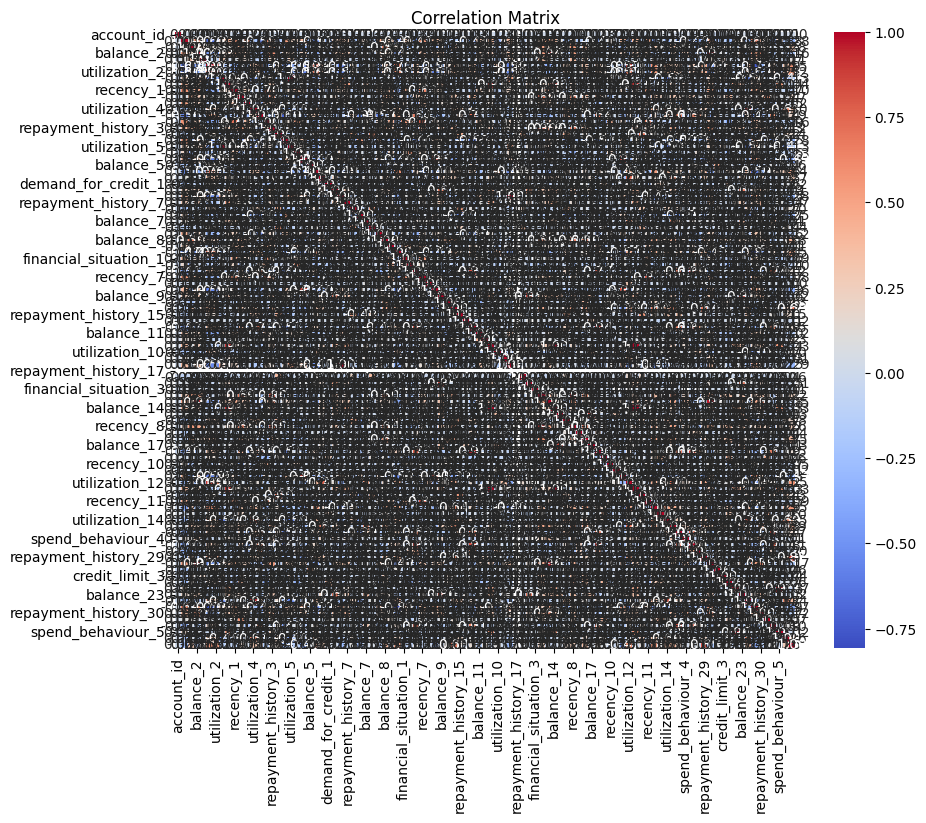

In [78]:
# Missing Data identification
missing_values = X_train.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
# print Correlation Analysis
correlation_matrix = X_train.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [79]:
# Preprocessing steps
# missing values
numeric_columns = X_train.select_dtypes(include='number')
# Apply imputation on the missing values (recency)
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(numeric_columns)
X_test_imputed = imputer.transform(numeric_columns)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [80]:
# to check cols for X_train and X_test, y_train and y_test are matching
def check_column_names_match(csv_file1, csv_file2):
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    if set(df1.columns) == set(df2.columns):
        print("Column names in both CSV files match.")
    else:
        print("Column names in both CSV files do not match.")
check_column_names_match("X_train.csv", "X_test.csv")
check_column_names_match("y_train.csv", "y_test.csv")

Column names in both CSV files match.
Column names in both CSV files match.


In [81]:
# Split the data into features (X) and labels (y)
X_train = train_data.drop(['account_id', 'label'], axis=1)
y_train = train_data['label']
X_test = test_data.drop(['account_id', 'label'], axis=1)
y_test = test_data['label']

In [82]:
# Count NaN values in each column of X_train
nan_counts = X_train.isna().sum()
# print the number of NaN values in each column
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
score_1                      0
balance_1                 1781
balance_2                 3374
balance_3                 5598
utilization_1             6146
                         ...  
spend_behaviour_5        22995
utilization_17            6146
utilization_18            6147
financial_situation_4        0
financial_situation_5        0
Length: 100, dtype: int64


In [83]:
row_counts = X_train.count()

#print number of non-missing values in each column
print("Number of non-missing values in each column:")
print(row_counts)

Number of non-missing values in each column:
score_1                  28397
balance_1                26616
balance_2                25023
balance_3                22799
utilization_1            22251
                         ...  
spend_behaviour_5         5402
utilization_17           22251
utilization_18           22250
financial_situation_4    28397
financial_situation_5    28397
Length: 100, dtype: int64


In [84]:
# Handle missing values (replace NaNs with zeros, I can choose a different strategy as mean mode etc.,
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [86]:
#identify categorical cols and do one hot encoding
categorical_columns1 = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns1)
columns_to_encode = ['financial_situation_4', 'financial_situation_5']
categorical_columns2 = X_test.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns2)
columns_to_encode = ['financial_situation_4', 'financial_situation_5']

Categorical Columns: Index(['financial_situation_4', 'financial_situation_5'], dtype='object')
Categorical Columns: Index(['financial_situation_4', 'financial_situation_5'], dtype='object')


In [87]:
# Apply one-hot encoding to these columns
X_train = pd.get_dummies(X_train, columns=columns_to_encode, drop_first=True)
X_test = pd.get_dummies(X_test, columns=columns_to_encode, drop_first=True)

In [88]:
# Model training -  Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [89]:
# Train the classifier on the training data
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Access feature importances
feature_importances = classifier.feature_importances_
print("Feature Importances:", feature_importances)
# Access other properties
n_estimators = classifier.n_estimators
criterion = classifier.criterion
# Print the classifier details
print(classifier)

Feature Importances: [4.34903248e-02 1.74586846e-02 2.05481040e-02 8.06686436e-03
 8.00499924e-03 7.81783318e-03 3.48497486e-03 2.00846201e-02
 1.58750713e-02 2.02547014e-02 1.09809791e-02 6.67954222e-03
 2.17165193e-02 2.20244572e-02 2.29159030e-02 1.42926304e-02
 1.61695621e-02 4.20069284e-03 1.54827240e-02 6.13705333e-03
 7.90747271e-03 1.43089720e-02 5.87059845e-03 1.88944972e-02
 5.93710771e-03 5.97763388e-03 1.14246359e-02 1.62868784e-02
 7.36979544e-03 5.69053136e-03 1.57796419e-02 9.28827272e-03
 1.53013536e-02 7.77659593e-03 6.09218504e-03 1.33409420e-02
 9.27671800e-03 2.21202025e-02 2.41680492e-02 4.55679885e-03
 4.79021205e-03 6.77630660e-03 1.32493279e-02 8.72241305e-03
 8.33229499e-03 2.78799844e-03 1.98577493e-02 8.58740687e-03
 7.05411585e-03 1.16732051e-02 3.88439886e-03 5.74797780e-03
 6.62413518e-03 0.00000000e+00 3.73564410e-03 1.50183718e-03
 7.52322538e-04 2.09461778e-02 9.34235768e-03 1.25944601e-02
 3.13441740e-03 2.01693893e-02 1.59909193e-02 3.72829251e-04
 1.

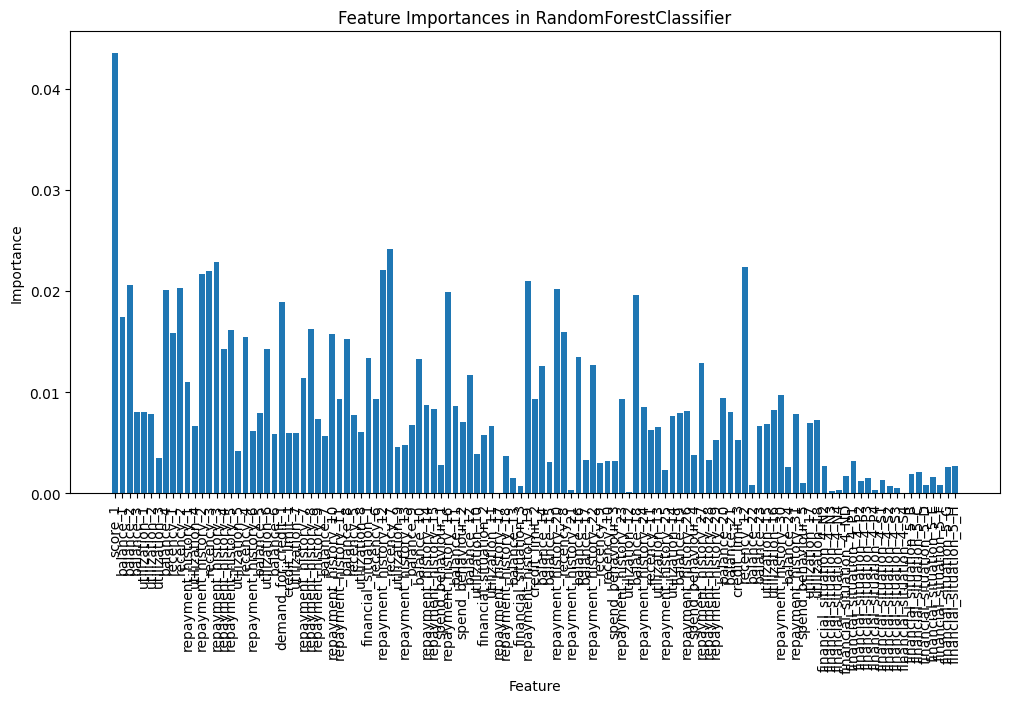

In [91]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in RandomForestClassifier')
plt.show()

Accuracy: 0.9419685414680649
Precision: 0.3333333333333333
Recall: 0.004123711340206186
F1 Score: 0.00814663951120163
Confusion Matrix:
[[7903    4]
 [ 483    2]]


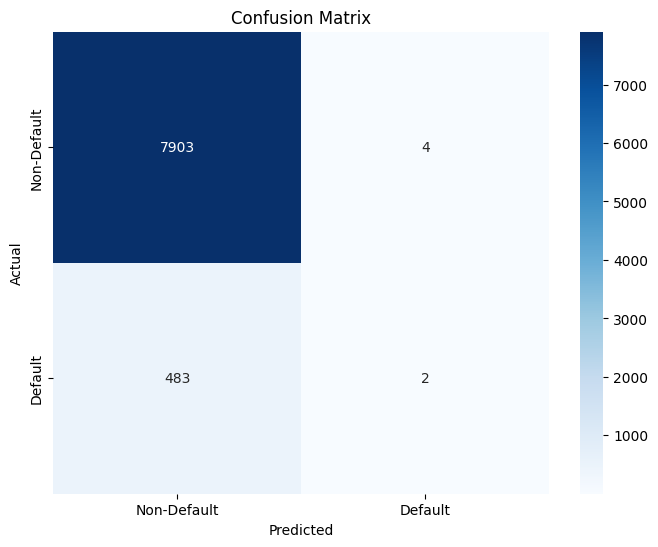

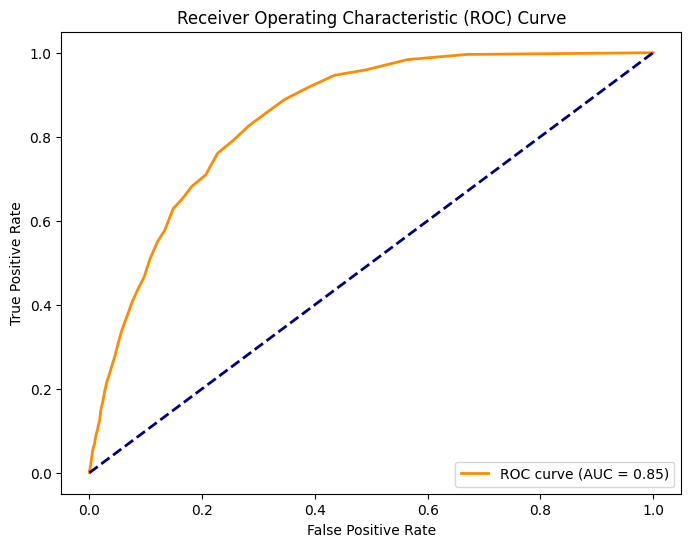

In [106]:
# Evaluating the classifier on test data
y_pred = classifier.predict(X_test)
# Model/classifier evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)
# Plot Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
y_scores = classifier.predict_proba(X_test)[:, 1]
# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
# Calculate AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Create a PDF file to save plots
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('model_evaluation_plots.pdf') as pdf:
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    pdf.savefig()
    plt.close()
    # Save the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    pdf.savefig()
    plt.close()

In [108]:
#display the classifier report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7907
           1       0.33      0.00      0.01       485

    accuracy                           0.94      8392
   macro avg       0.64      0.50      0.49      8392
weighted avg       0.91      0.94      0.91      8392



In [109]:
import pickle
from sklearn.ensemble import RandomForestClassifier  # Replace with your actual model class
# classifier- trained model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)  # Replace with your actual training data
# Save the model as pickle
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

In [ ]:
import pickle
# need to Load the trained model from the file
with open('trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
# if new data is defined as 'X_new' for inference
X_new = #have to replace the file here
# predictions for the new data
predictions = loaded_model.predict(X_new)
print(predictions)